# Perceptron: Single-Layer Neural Network

This notebook demonstrates how a single-layer perceptron works, including:
- The perceptron neuron model
- The learning algorithm
- Visualization of weight and bias changes during training
- Decision boundary visualization

In [56]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
rng = np.random.default_rng(42)
sns.set_style("whitegrid")

## The Perceptron Class

A simple perceptron with the learning rule and tracking for visualization.

In [ ]:
class SimplePerceptron:
    """
    A simple single-layer perceptron for binary classification.
    
    The perceptron uses the hard-limit activation function and learns
    using the perceptron learning rule.
    """
    
    def __init__(self, n_features, learning_rate=1.0):
        """
        Initialize the perceptron.
        
        Parameters:
        - n_features: number of input features
        - learning_rate: learning rate for weight updates
        """
        self.learning_rate = learning_rate
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        
        # History tracking for visualization
        self.weight_history = [self.weights.copy()]
        self.bias_history = [self.bias]
        self.error_history = []
        self.epoch_errors = []
        self.epoch_accuracy = []  # Track accuracy per epoch
        
    def hard_limit(self, net_input):
        """Apply the hard-limit activation function: 1 if net_input >= 0, else 0"""
        return 1 if net_input >= 0 else 0
    
    def predict(self, X):
        """
        Make predictions for input samples.
        
        Parameters:
        - X: input array of shape (n_samples, n_features)
        
        Returns:
        - predictions: binary predictions (0 or 1)
        """
        net_input = np.dot(X, self.weights) + self.bias
        return np.array([self.hard_limit(x) for x in net_input])
    
    def train(self, X, y, epochs=100, verbose=True):
        """
        Train the perceptron on the training data.
        
        Parameters:
        - X: training input data (n_samples, n_features)
        - y: target labels (n_samples,) with values 0 or 1
        - epochs: number of training epochs
        - verbose: print training progress
        
        Returns:
        - training history
        """
        for epoch in range(epochs):
            epoch_error = 0
            
            for x_i, y_i in zip(X, y):
                # Compute net input
                net_input = np.dot(x_i, self.weights) + self.bias
                
                # Make prediction
                prediction = self.hard_limit(net_input)
                
                # Compute error
                error = y_i - prediction
                epoch_error += int(error != 0)
                
                # Update weights and bias (perceptron learning rule)
                # Δw = (t - a) * x = e * x
                # Δb = (t - a) = e
                weight_update = self.learning_rate * error * x_i
                bias_update = self.learning_rate * error
                
                self.weights += weight_update
                self.bias += bias_update
                
                # Track error history
                self.error_history.append(error)
            
            # Calculate epoch accuracy
            epoch_acc = 1.0 - (epoch_error / len(X))
            
            # Track epoch metrics
            self.epoch_errors.append(epoch_error)
            self.epoch_accuracy.append(epoch_acc)
            self.weight_history.append(self.weights.copy())
            self.bias_history.append(self.bias)
            
            if verbose and (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Errors: {epoch_error}, Accuracy: {epoch_acc*100:.1f}%")
            
            # Early stopping if no errors
            if epoch_error == 0:
                if verbose:
                    print(f"✓ Converged at epoch {epoch + 1} with 100% accuracy")
                break
        
        return self
    
    def accuracy(self, X, y):
        """Calculate accuracy on given data"""
        predictions = self.predict(X)
        return np.mean(predictions == y)

print("✓ Perceptron class defined successfully")

✓ Perceptron class defined successfully


In [58]:
# Explanation: How Epoch Accuracy is Computed

"""
In the SimplePerceptron class above, epoch accuracy is calculated as follows:

STEP 1: Count Misclassifications
---------------------------------
During each epoch, we iterate through all training samples and count how many
predictions were incorrect:

    epoch_error = 0
    for each sample (x_i, y_i):
        prediction = hard_limit(w·x_i + b)
        error = y_i - prediction
        if error != 0:  # means prediction was wrong
            epoch_error += 1

STEP 2: Calculate Accuracy
---------------------------
Accuracy is the proportion of CORRECT predictions:

    epoch_acc = 1.0 - (epoch_error / len(X))
    
Or equivalently:
    
    epoch_acc = (correct_predictions / total_predictions)
    epoch_acc = (total_samples - errors) / total_samples
    epoch_acc = 1.0 - (errors / total_samples)

EXAMPLE:
--------
If we have 60 training samples:
- Epoch 1: 15 errors → accuracy = 1.0 - (15/60) = 0.75 = 75%
- Epoch 2: 5 errors  → accuracy = 1.0 - (5/60) = 0.917 = 91.7%
- Epoch 3: 0 errors  → accuracy = 1.0 - (0/60) = 1.0 = 100%

KEY POINTS:
-----------
• Accuracy ranges from 0.0 (0%) to 1.0 (100%)
• epoch_error counts misclassifications (wrong predictions)
• Perfect classification: epoch_error = 0, accuracy = 100%
• The perceptron stops early if epoch_error = 0 (convergence)
"""

print("✓ Epoch accuracy computation explained")
print("\nFormula: accuracy = 1.0 - (misclassifications / total_samples)")
print("         accuracy = (correct_predictions / total_samples)")

✓ Epoch accuracy computation explained

Formula: accuracy = 1.0 - (misclassifications / total_samples)
         accuracy = (correct_predictions / total_samples)


## Generate Linearly Separable Training Data

A simple binary classification problem where two classes are linearly separable.

Training data shape: (60, 2)
Class 0 samples: 30
Class 1 samples: 30
Training output shape: (60,)
✓ Saved: images/01_training_data.png


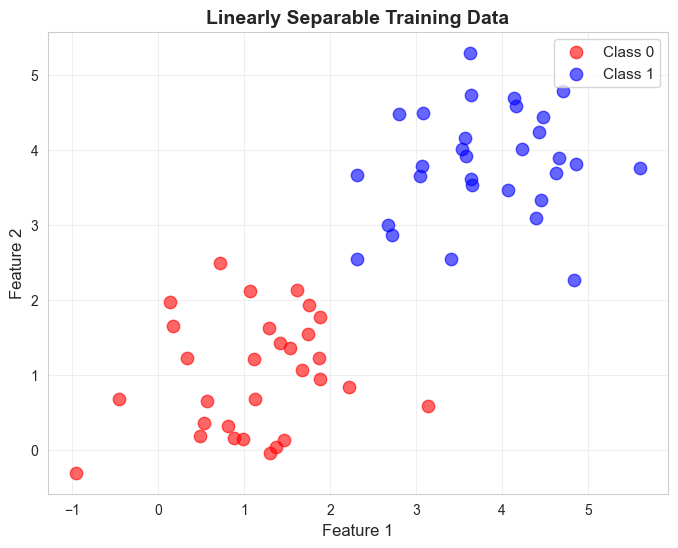

In [59]:
# Generate training data
# 30 samples from standard normal distribution (mean=0, std=1) with 2 features each
#  Shifts all points so they cluster around (1, 1) (4, 4)
# Class 0: cluster points around (1, 1)
class_0 = rng.normal(loc=1.0, scale=1.0, size=(30, 2))

# Class 1: cluster points around (4, 4)  
class_1 = rng.normal(loc=4.0, scale=1.0, size=(30, 2))

# Combine and create labels
X_train = np.vstack([class_0, class_1]) # 60 samples stacked - shape (60, 2)
y_train = np.hstack([np.zeros(30), np.ones(30)]) # shape (60,)

# Shuffle the data
indices = np.random.permutation(len(X_train)) # random permutation of indices
X_train = X_train[indices] # reorder
y_train = y_train[indices] # reorder

print(f"Training data shape: {X_train.shape}")
print(f"Class 0 samples: {np.sum(y_train == 0)}")
print(f"Class 1 samples: {np.sum(y_train == 1)}")
print(f"Training output shape: {y_train.shape}")

# Visualize the training data
plt.figure(figsize=(8, 6)) # Width, Height in inches
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
           label='Class 0', alpha=0.6, s=80, color='red')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
           label='Class 1', alpha=0.6, s=80, color='blue')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Linearly Separable Training Data', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Save the figure
import os
images_dir = 'images'
os.makedirs(images_dir, exist_ok=True)
plt.savefig(os.path.join(images_dir, '01_training_data.png'), dpi=150, bbox_inches='tight')
print(f"✓ Saved: {images_dir}/01_training_data.png")

plt.show()

In [60]:
import os

# Create images directory if it doesn't exist
images_dir = 'images'
os.makedirs(images_dir, exist_ok=True)
print(f"✓ Images directory ready: {os.path.abspath(images_dir)}")

✓ Images directory ready: c:\Users\ksupr\Documents\deep-learning\perceptron\images


## Train the Perceptron

Train the perceptron and track how weights and bias change over time.

In [61]:
# Create and train the perceptron
perceptron = SimplePerceptron(n_features=2, learning_rate=0.1)
perceptron.train(X_train, y_train, epochs=50, verbose=True)

# Check final accuracy
train_accuracy = perceptron.accuracy(X_train, y_train)
print(f"\nFinal Training Accuracy: {train_accuracy * 100:.1f}%")
print(f"Final Weights: w1={perceptron.weights[0]:.4f}, w2={perceptron.weights[1]:.4f}")
print(f"Final Bias: {perceptron.bias:.4f}")

✓ Converged at epoch 4 with 100% accuracy

Final Training Accuracy: 100.0%
Final Weights: w1=0.3520, w2=0.3996
Final Bias: -1.5000


## Visualize Weight and Bias Changes During Training

This is the key visualization showing how the perceptron learns!

✓ Saved: images/02_training_dynamics.png


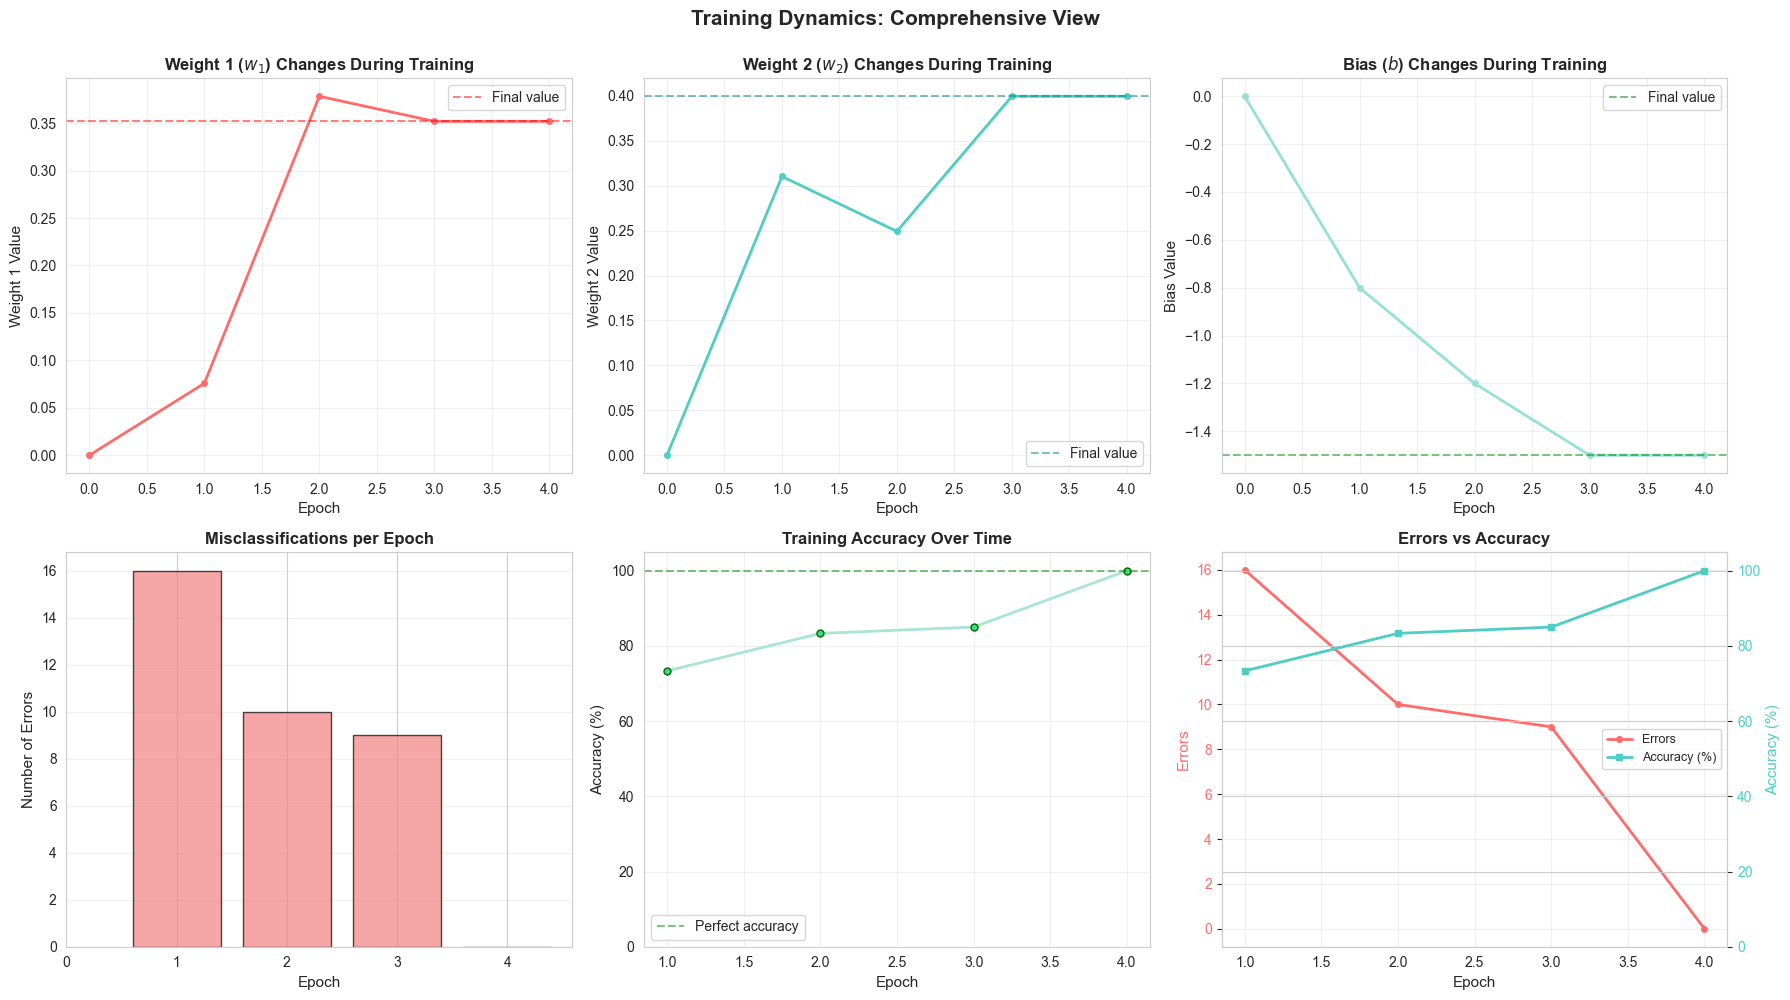

✓ Training visualization complete


In [62]:
# Prepare data for visualization
epochs_range = range(len(perceptron.weight_history))
weight_1_history = [w[0] for w in perceptron.weight_history]
weight_2_history = [w[1] for w in perceptron.weight_history]
bias_history = perceptron.bias_history
epoch_errors = perceptron.epoch_errors
epoch_accuracy = perceptron.epoch_accuracy

# Create a comprehensive visualization with 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Weight 1 changes over time
ax1 = axes[0, 0]
ax1.plot(epochs_range, weight_1_history, 'o-', linewidth=2, markersize=4, color='#FF6B6B')
ax1.set_xlabel('Epoch', fontsize=11)
ax1.set_ylabel('Weight 1 Value', fontsize=11)
ax1.set_title(r'Weight 1 ($w_1$) Changes During Training', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=weight_1_history[-1], color='red', linestyle='--', alpha=0.5, label='Final value')
ax1.legend()

# Plot 2: Weight 2 changes over time
ax2 = axes[0, 1]
ax2.plot(epochs_range, weight_2_history, 'o-', linewidth=2, markersize=4, color='#4ECDC4')
ax2.set_xlabel('Epoch', fontsize=11)
ax2.set_ylabel('Weight 2 Value', fontsize=11)
ax2.set_title(r'Weight 2 ($w_2$) Changes During Training', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=weight_2_history[-1], color='teal', linestyle='--', alpha=0.5, label='Final value')
ax2.legend()

# Plot 3: Bias changes over time
ax3 = axes[0, 2]
ax3.plot(epochs_range, bias_history, 'o-', linewidth=2, markersize=4, color='#95E1D3')
ax3.set_xlabel('Epoch', fontsize=11)
ax3.set_ylabel('Bias Value', fontsize=11)
ax3.set_title(r'Bias ($b$) Changes During Training', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=bias_history[-1], color='green', linestyle='--', alpha=0.5, label='Final value')
ax3.legend()

# Plot 4: Errors per epoch
ax4 = axes[1, 0]
epochs_with_errors = range(1, len(epoch_errors) + 1)
ax4.bar(epochs_with_errors, epoch_errors, color='#F38181', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Epoch', fontsize=11)
ax4.set_ylabel('Number of Errors', fontsize=11)
ax4.set_title('Misclassifications per Epoch', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_xticks(range(0, max(epochs_with_errors) + 1, max(1, max(epochs_with_errors)//10)))

# Plot 5: Accuracy over epochs
ax5 = axes[1, 1]
epochs_acc = range(1, len(epoch_accuracy) + 1)
ax5.plot(epochs_acc, [acc * 100 for acc in epoch_accuracy], 'o-', linewidth=2, 
         markersize=5, color='#A8E6CF', markerfacecolor='#3DDC84', markeredgecolor='darkgreen')
ax5.set_xlabel('Epoch', fontsize=11)
ax5.set_ylabel('Accuracy (%)', fontsize=11)
ax5.set_title('Training Accuracy Over Time', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.set_ylim([0, 105])
ax5.axhline(y=100, color='green', linestyle='--', alpha=0.5, label='Perfect accuracy')
ax5.legend()

# Plot 6: Combined view - Errors and Accuracy
ax6 = axes[1, 2]
ax6_twin = ax6.twinx()

# Plot errors on left y-axis
line1 = ax6.plot(epochs_with_errors, epoch_errors, 'o-', linewidth=2, markersize=4, 
                 color='#FF6B6B', label='Errors')
ax6.set_xlabel('Epoch', fontsize=11)
ax6.set_ylabel('Errors', fontsize=11, color='#FF6B6B')
ax6.tick_params(axis='y', labelcolor='#FF6B6B')
ax6.grid(True, alpha=0.3)

# Plot accuracy on right y-axis
line2 = ax6_twin.plot(epochs_acc, [acc * 100 for acc in epoch_accuracy], 's-', linewidth=2, 
                      markersize=4, color='#4ECDC4', label='Accuracy (%)')
ax6_twin.set_ylabel('Accuracy (%)', fontsize=11, color='#4ECDC4')
ax6_twin.tick_params(axis='y', labelcolor='#4ECDC4')
ax6_twin.set_ylim([0, 105])

ax6.set_title('Errors vs Accuracy', fontsize=12, fontweight='bold')

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax6.legend(lines, labels, loc='center right', fontsize=9)

plt.suptitle('Training Dynamics: Comprehensive View', fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()

# Save the figure
import os
images_dir = 'images'
os.makedirs(images_dir, exist_ok=True)
plt.savefig(os.path.join(images_dir, '02_training_dynamics.png'), dpi=150, bbox_inches='tight')
print(f"✓ Saved: {images_dir}/02_training_dynamics.png")

plt.show()

print("✓ Training visualization complete")

## Decision Boundary Visualization

Visualize how the decision boundary evolves as the perceptron learns.

✓ Saved: images/03_boundary_evolution.png


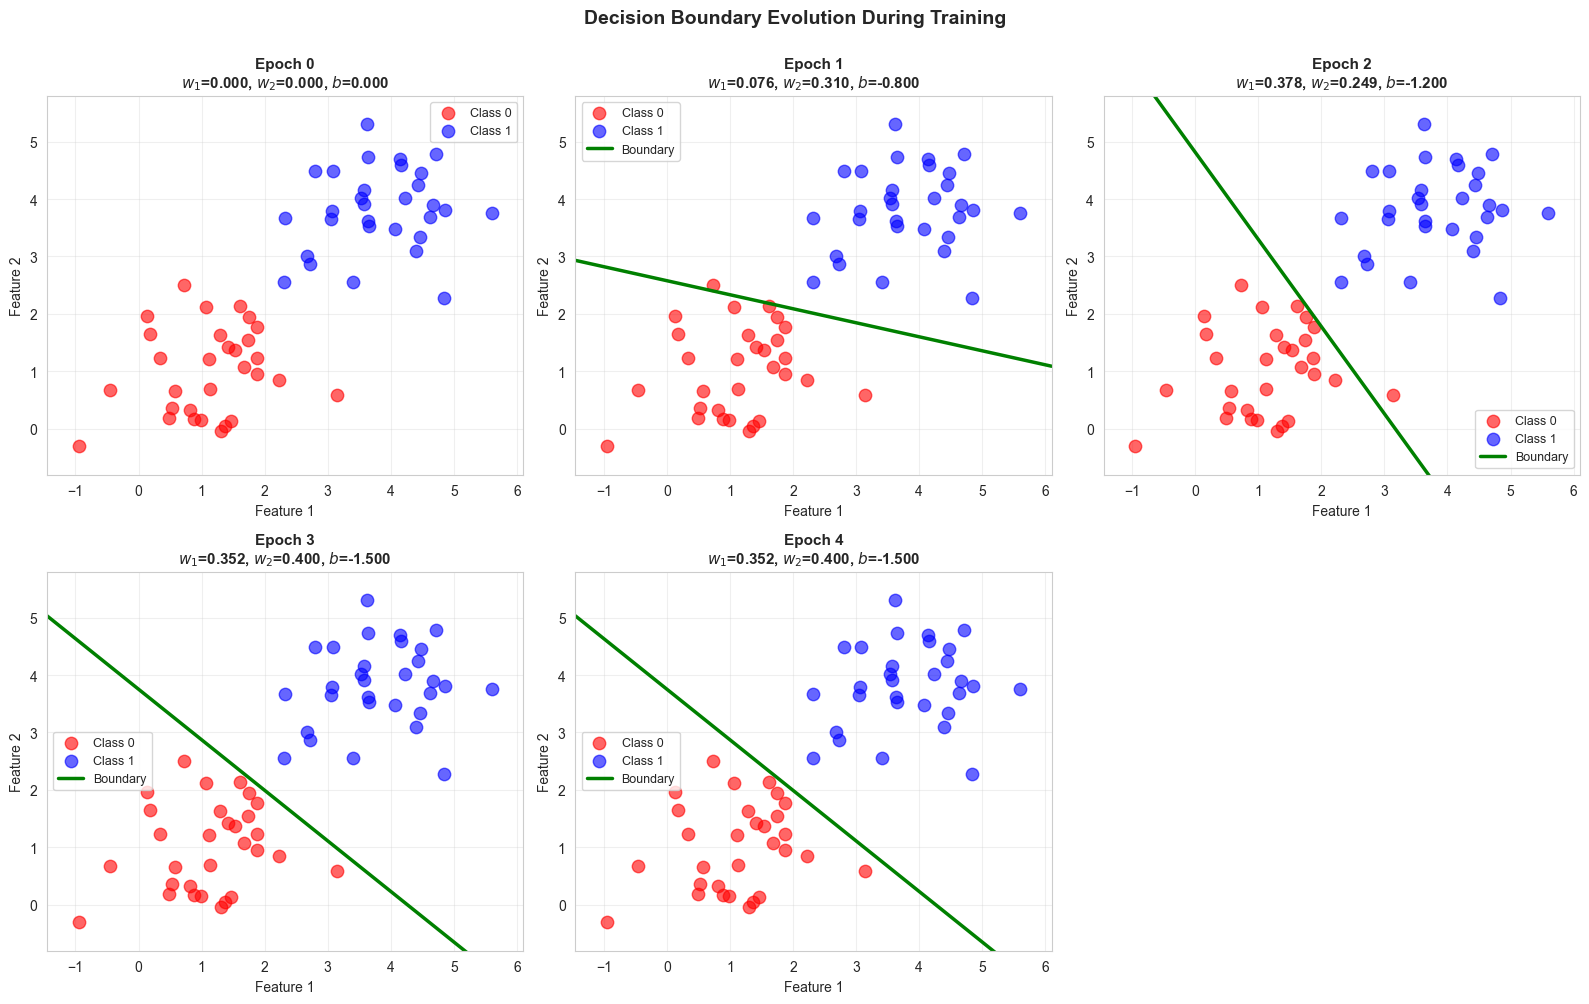

✓ Decision boundary visualization complete


In [63]:
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary"):
    """Plot data points and the decision boundary of the perceptron"""
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot data points
    ax.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', 
              alpha=0.6, s=100, color='red', edgecolors='darkred', linewidth=1.5)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', 
              alpha=0.6, s=100, color='blue', edgecolors='darkblue', linewidth=1.5)
    
    # Create mesh for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Decision boundary: w1*x1 + w2*x2 + b = 0
    # Solve for x2: x2 = (-w1*x1 - b) / w2
    if weights[1] != 0:
        x_boundary = np.linspace(x_min, x_max, 100)
        y_boundary = (-weights[0] * x_boundary - bias) / weights[1]
        ax.plot(x_boundary, y_boundary, 'g-', linewidth=3, label='Decision Boundary')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    return fig

# Plot decision boundaries at different epochs
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Pick up to 6 valid epoch indices spanning training
max_idx = len(perceptron.weight_history) - 1
num_plots = min(len(perceptron.weight_history), max_idx + 1)
epochs_to_show = np.linspace(0, max_idx, num=num_plots, dtype=int).tolist()

for idx, epoch in enumerate(epochs_to_show):
    ax = axes[idx // 3, idx % 3]
    
    # Get weights and bias at this epoch
    w = perceptron.weight_history[epoch]
    b = perceptron.bias_history[epoch]
    
    # Plot data points
    ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
              label='Class 0', alpha=0.6, s=80, color='red')
    ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
              label='Class 1', alpha=0.6, s=80, color='blue')
    
    # Draw decision boundary
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    
    if w[1] != 0:
        x_boundary = np.linspace(x_min, x_max, 100)
        y_boundary = (-w[0] * x_boundary - b) / w[1]
        ax.plot(x_boundary, y_boundary, 'g-', linewidth=2.5, label='Boundary')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('Feature 1', fontsize=10)
    ax.set_ylabel('Feature 2', fontsize=10)
    ax.set_title(rf'Epoch {epoch}'+'\n'+rf'$w_1$={w[0]:.3f}, $w_2$={w[1]:.3f}, $b$={b:.3f}', 
                fontsize=11, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

# Hide any unused subplots if training was short
for j in range(len(epochs_to_show), 6):
    axes[j // 3, j % 3].axis('off')

plt.suptitle('Decision Boundary Evolution During Training', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()

# Save the figure
import os
images_dir = 'images'
os.makedirs(images_dir, exist_ok=True)
plt.savefig(os.path.join(images_dir, '03_boundary_evolution.png'), dpi=150, bbox_inches='tight')
print(f"✓ Saved: {images_dir}/03_boundary_evolution.png")

plt.show()

print("✓ Decision boundary visualization complete")

## Final Decision Boundary with Predictions

The final learned boundary with all predictions.

✓ Saved: images/04_final_boundary.png


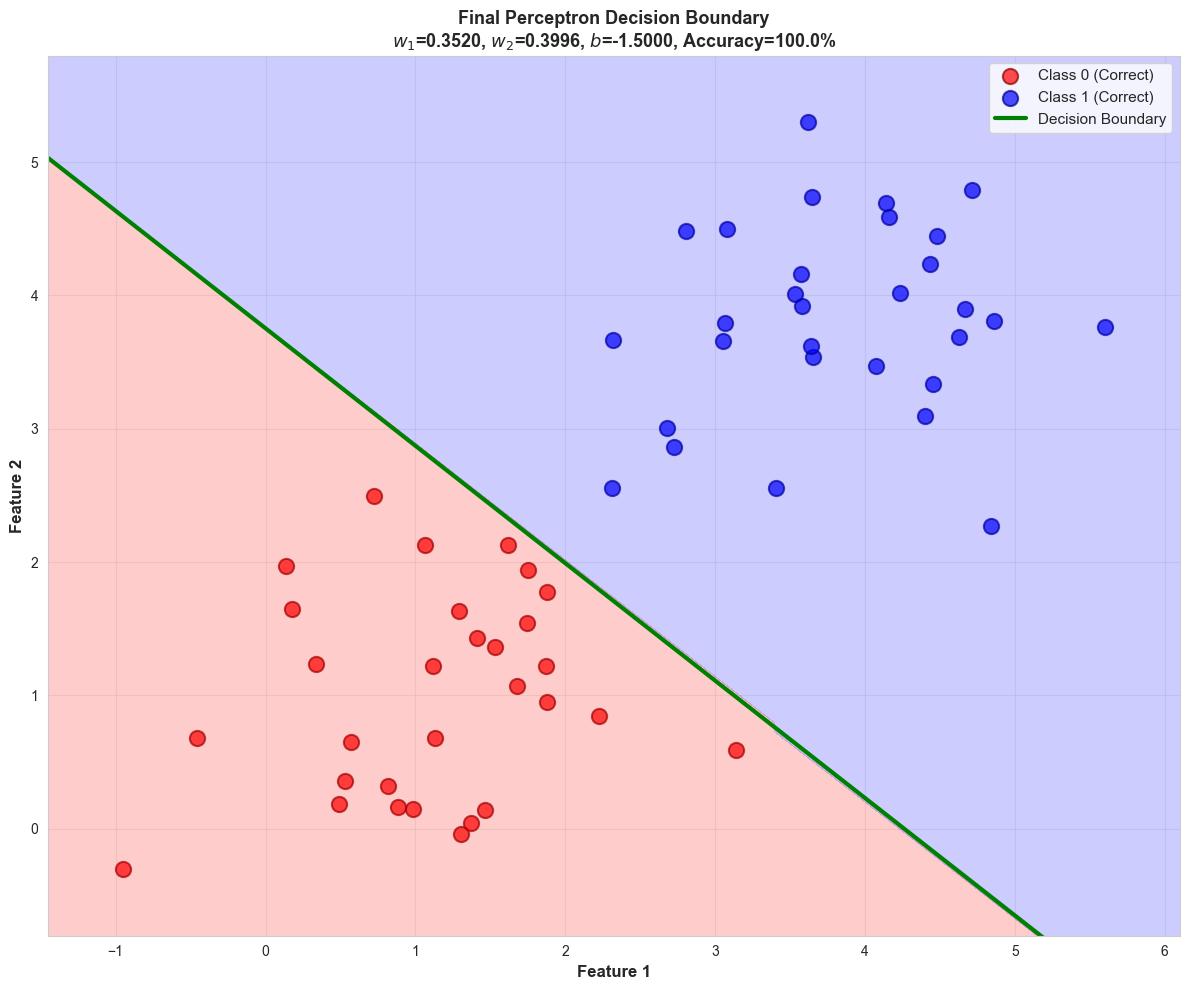

In [64]:
# Get predictions for all training data
predictions = perceptron.predict(X_train)
correct = predictions == y_train

# Create final visualization
fig, ax = plt.subplots(figsize=(12, 10))

# Plot correct predictions
correct_mask = correct == True
ax.scatter(X_train[correct_mask & (y_train == 0), 0], 
          X_train[correct_mask & (y_train == 0), 1],
          label='Class 0 (Correct)', alpha=0.7, s=120, color='red', 
          marker='o', edgecolors='darkred', linewidth=1.5)
ax.scatter(X_train[correct_mask & (y_train == 1), 0], 
          X_train[correct_mask & (y_train == 1), 1],
          label='Class 1 (Correct)', alpha=0.7, s=120, color='blue', 
          marker='o', edgecolors='darkblue', linewidth=1.5)

# Plot misclassifications if any
incorrect_mask = correct == False
if np.any(incorrect_mask):
    ax.scatter(X_train[incorrect_mask, 0], X_train[incorrect_mask, 1],
              label='Misclassified', alpha=0.7, s=120, color='yellow', 
              marker='X', edgecolors='black', linewidth=2)

# Draw decision boundary
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

w = perceptron.weights
b = perceptron.bias

if w[1] != 0:
    x_boundary = np.linspace(x_min, x_max, 100)
    y_boundary = (-w[0] * x_boundary - b) / w[1]
    ax.plot(x_boundary, y_boundary, 'g-', linewidth=3, label='Decision Boundary')

# Add shaded regions for decision (vectorized prediction)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid_points)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.2, levels=[0, 0.5, 1], colors=['red', 'blue'])

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Feature 1', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature 2', fontsize=12, fontweight='bold')
ax.set_title('Final Perceptron Decision Boundary\n' + 
            rf'$w_1$={w[0]:.4f}, $w_2$={w[1]:.4f}, $b$={b:.4f}, Accuracy={train_accuracy*100:.1f}%',
            fontsize=13, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

# Save the figure
import os
images_dir = 'images'
os.makedirs(images_dir, exist_ok=True)
plt.savefig(os.path.join(images_dir, '04_final_boundary.png'), dpi=150, bbox_inches='tight')
print(f"✓ Saved: {images_dir}/04_final_boundary.png")

plt.tight_layout()
plt.show()

## Understanding the Perceptron Learning Rule

The perceptron learns by adjusting weights and bias based on misclassifications:

**Learning Rule:**
- **If correct (a = t):** No change → Δw = 0, Δb = 0
- **If error (a ≠ t):** Update → Δw = (t - a) · x, Δb = (t - a)

**The process:**
1. Present training example (x, t)
2. Compute output: a = hardlim(w·x + b)
3. Compute error: e = t - a
4. Update weights: w_new = w_old + e·x
5. Update bias: b_new = b_old + e
6. Repeat until convergence

This simple rule is proven to converge in finite time for linearly separable data!

## Summary Statistics

In [65]:
print("=" * 60)
print("PERCEPTRON TRAINING SUMMARY")
print("=" * 60)
print(f"\nTraining Data:")
print(f"  • Total samples: {len(X_train)}")
print(f"  • Class 0 samples: {np.sum(y_train == 0)}")
print(f"  • Class 1 samples: {np.sum(y_train == 1)}")
print(f"  • Features per sample: {X_train.shape[1]}")

print(f"\nInitial Weights and Bias:")
print(f"  • w1 = {perceptron.weight_history[0][0]:.4f}")
print(f"  • w2 = {perceptron.weight_history[0][1]:.4f}")
print(f"  • b  = {perceptron.bias_history[0]:.4f}")

print(f"\nFinal Weights and Bias:")
print(f"  • w1 = {perceptron.weights[0]:.4f}")
print(f"  • w2 = {perceptron.weights[1]:.4f}")
print(f"  • b  = {perceptron.bias:.4f}")

print(f"\nTraining Results:")
print(f"  • Epochs trained: {len(perceptron.epoch_errors)}")
print(f"  • Final accuracy: {train_accuracy * 100:.1f}%")
print(f"  • Total errors in final epoch: {perceptron.epoch_errors[-1]}")
print(f"  • Learning rate: {perceptron.learning_rate}")

print(f"\nWeight Changes:")
print(f"  • Δw1 = {perceptron.weights[0] - perceptron.weight_history[0][0]:.4f}")
print(f"  • Δw2 = {perceptron.weights[1] - perceptron.weight_history[0][1]:.4f}")
print(f"  • Δb  = {perceptron.bias - perceptron.bias_history[0]:.4f}")

# Calculate decision boundary equation
w = perceptron.weights
b = perceptron.bias
print(f"\nDecision Boundary Equation:")
print(f"  {w[0]:.4f}·x1 + {w[1]:.4f}·x2 + {b:.4f} = 0")
if w[1] != 0:
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    print(f"  or: x2 = {slope:.4f}·x1 + {intercept:.4f}")

print("\n" + "=" * 60)

PERCEPTRON TRAINING SUMMARY

Training Data:
  • Total samples: 60
  • Class 0 samples: 30
  • Class 1 samples: 30
  • Features per sample: 2

Initial Weights and Bias:
  • w1 = 0.0000
  • w2 = 0.0000
  • b  = 0.0000

Final Weights and Bias:
  • w1 = 0.3520
  • w2 = 0.3996
  • b  = -1.5000

Training Results:
  • Epochs trained: 4
  • Final accuracy: 100.0%
  • Total errors in final epoch: 0
  • Learning rate: 0.1

Weight Changes:
  • Δw1 = 0.3520
  • Δw2 = 0.3996
  • Δb  = -1.5000

Decision Boundary Equation:
  0.3520·x1 + 0.3996·x2 + -1.5000 = 0
  or: x2 = -0.8807·x1 + 3.7535

